# Example 1: Solving Constraints of a $U(1)$ BF-Theory

*Author: Waleed Sherif (FAU Erlangen-Nürnberg)*

In this tutorial, we introduce the basic usage of the [neuraLQX](https://www.github.com/waleed-sh/neuralqx) package by building and solving a toy model of loop quantum gravity (LQG). This will include basic functionality such as:
- Defining custom graphs
- Choosing a gauge group
- Choosing a gravitational model
- Solving the constraints

This basic introduction is supposed to help understand how to build and address more complex systems of interest.

## 0.0 The $U(1)$ BF-Theory

The $U(1)$ BF-theory is a simple enough toy model to start with. The reason being the model is analytically solvable, and in principle one knows what solutions to expect. The theory is defined by an action of the form

$$
S = \int_{M^{(n)}}\mathrm{tr}(B \wedge F(\omega))
$$

where $M^{(n)}$ is an $n$-dimensional manifold with a fixed compact Lie group $G$ equipped with a non-degenerate non-linear form and a corresponding Lie algebra. Here, $B$ is a Lie algebra valued $n-2$ form and $\omega$ is a Lie algebra valued connection with a curvature 2-form $F = \mathrm{d}\omega + \omega\wedge\omega$. The stationary points of the action fulfill the equations

$$
F(\omega) = 0 \qquad , \qquad \mathrm{d}^{(\omega)}B = 0,
$$

whereby the solutions are flat connections $\omega$ and covariantly constant fields $B$.

## 0.1 The quantum $U_q(1)$ BF-Theory à la LQG

The theory outlined above can be quantised using LQG (see [here](https://arxiv.org/pdf/2402.10622)). To be able to implement the model on a computational framework, the kinematical degrees of freedom are restricted by fixing a graph and imposing a cutoff on the representation labels $m_e$ of the holonomies which live on each edge $e \in E(\gamma)$ of the graph $\gamma$. For the $U(1)$ case, the representation labels are charges $m\in\mathbb{Z}$. A cutoff is imposed such that any charge $m_e$ is allowed to take values in the set of allowed charge numbers $M := [-m_{max}, ..., m_{max}]$.

In this case, the two constraints of the theory are the curvature constraint which is expressed as (see section 2.1 of [this paper](https://arxiv.org/pdf/2402.10622))
$$
\hat{F} = \sum_{\alpha \in L(\gamma)} (\hat{h}_{\alpha} - \mathbb{I})(\hat{h}^{\dagger}_{\alpha} - \mathbb{I}),
$$

where $\hat{h}_{\alpha}$ are the minimal loop holonomies over a minimal loop $\alpha$. The curvature constraint ensures flatness over the entire graph by ensuring flatness over the minimal loops (from which all loops in the graph can be formed from).

The Gauß constraint takes the form
$$
\hat{G} = \sum_{v \in V(\gamma)}\left(\sum_{e \in E_i(v)}\hat{N}_{e} - \sum_{e' \in E_o(v)} \hat{N}_{e'}\right),
$$

where $E_i(v), E_o(v)$ are the set of edges incident at and emanating from $v$ respectively and $\hat{N}$ is a number operator. Essentially, the Gauß constraint dictates charge conservation at every vertex.

In this tutorial, we will solve the constraint
$$
\hat{C} = \hat{F} + \hat{G}
$$

## 1.0 Installing neuraLQX

The first step is installing neuraLQX. This can be done using ``pip`` by executing the following command in your terminal/command line tool:

`>>> pip install --upgrade pip`


`>>> pip install neuralqx`

Once installed, you can simply import `neuralqx` in your Jupyter or python script as

In [1]:
import neuralqx as nqx

[ax90ymed.vpn.rrze.uni-erlangen.de:35294] shmem: mmap: an error occurred while determining whether or not /var/folders/xg/bdgwxkwj0jn0zlwmbt50xfzw0000gn/T//ompi.ax90ymed.501/jf.0/386990080/sm_segment.ax90ymed.501.17110000.0 could be created.


## 2.0 Defining the graph

The first step in constructing the model is to start with the graph. NeuraLQX comes with a `graph` module which includes the `GraphHandler` class. This class is responsible for implementing the graph of choice in the computational framework. It is also responsible for graph specific computation, such as computing the $\mathrm{sgn}(e, e')$ for any two (or three) given edges.

To create a graph, simply specify a set of *oriented* edges which indicate how the vertices in the graph are connected to one another. Vertices are labeled by integers $a, b, ...$. Therefore, the edge $[a, b]$ is an edge starting from the vertex $a$ and ending at the vertex $b$. In this example, we will consider the following, 2-L graph

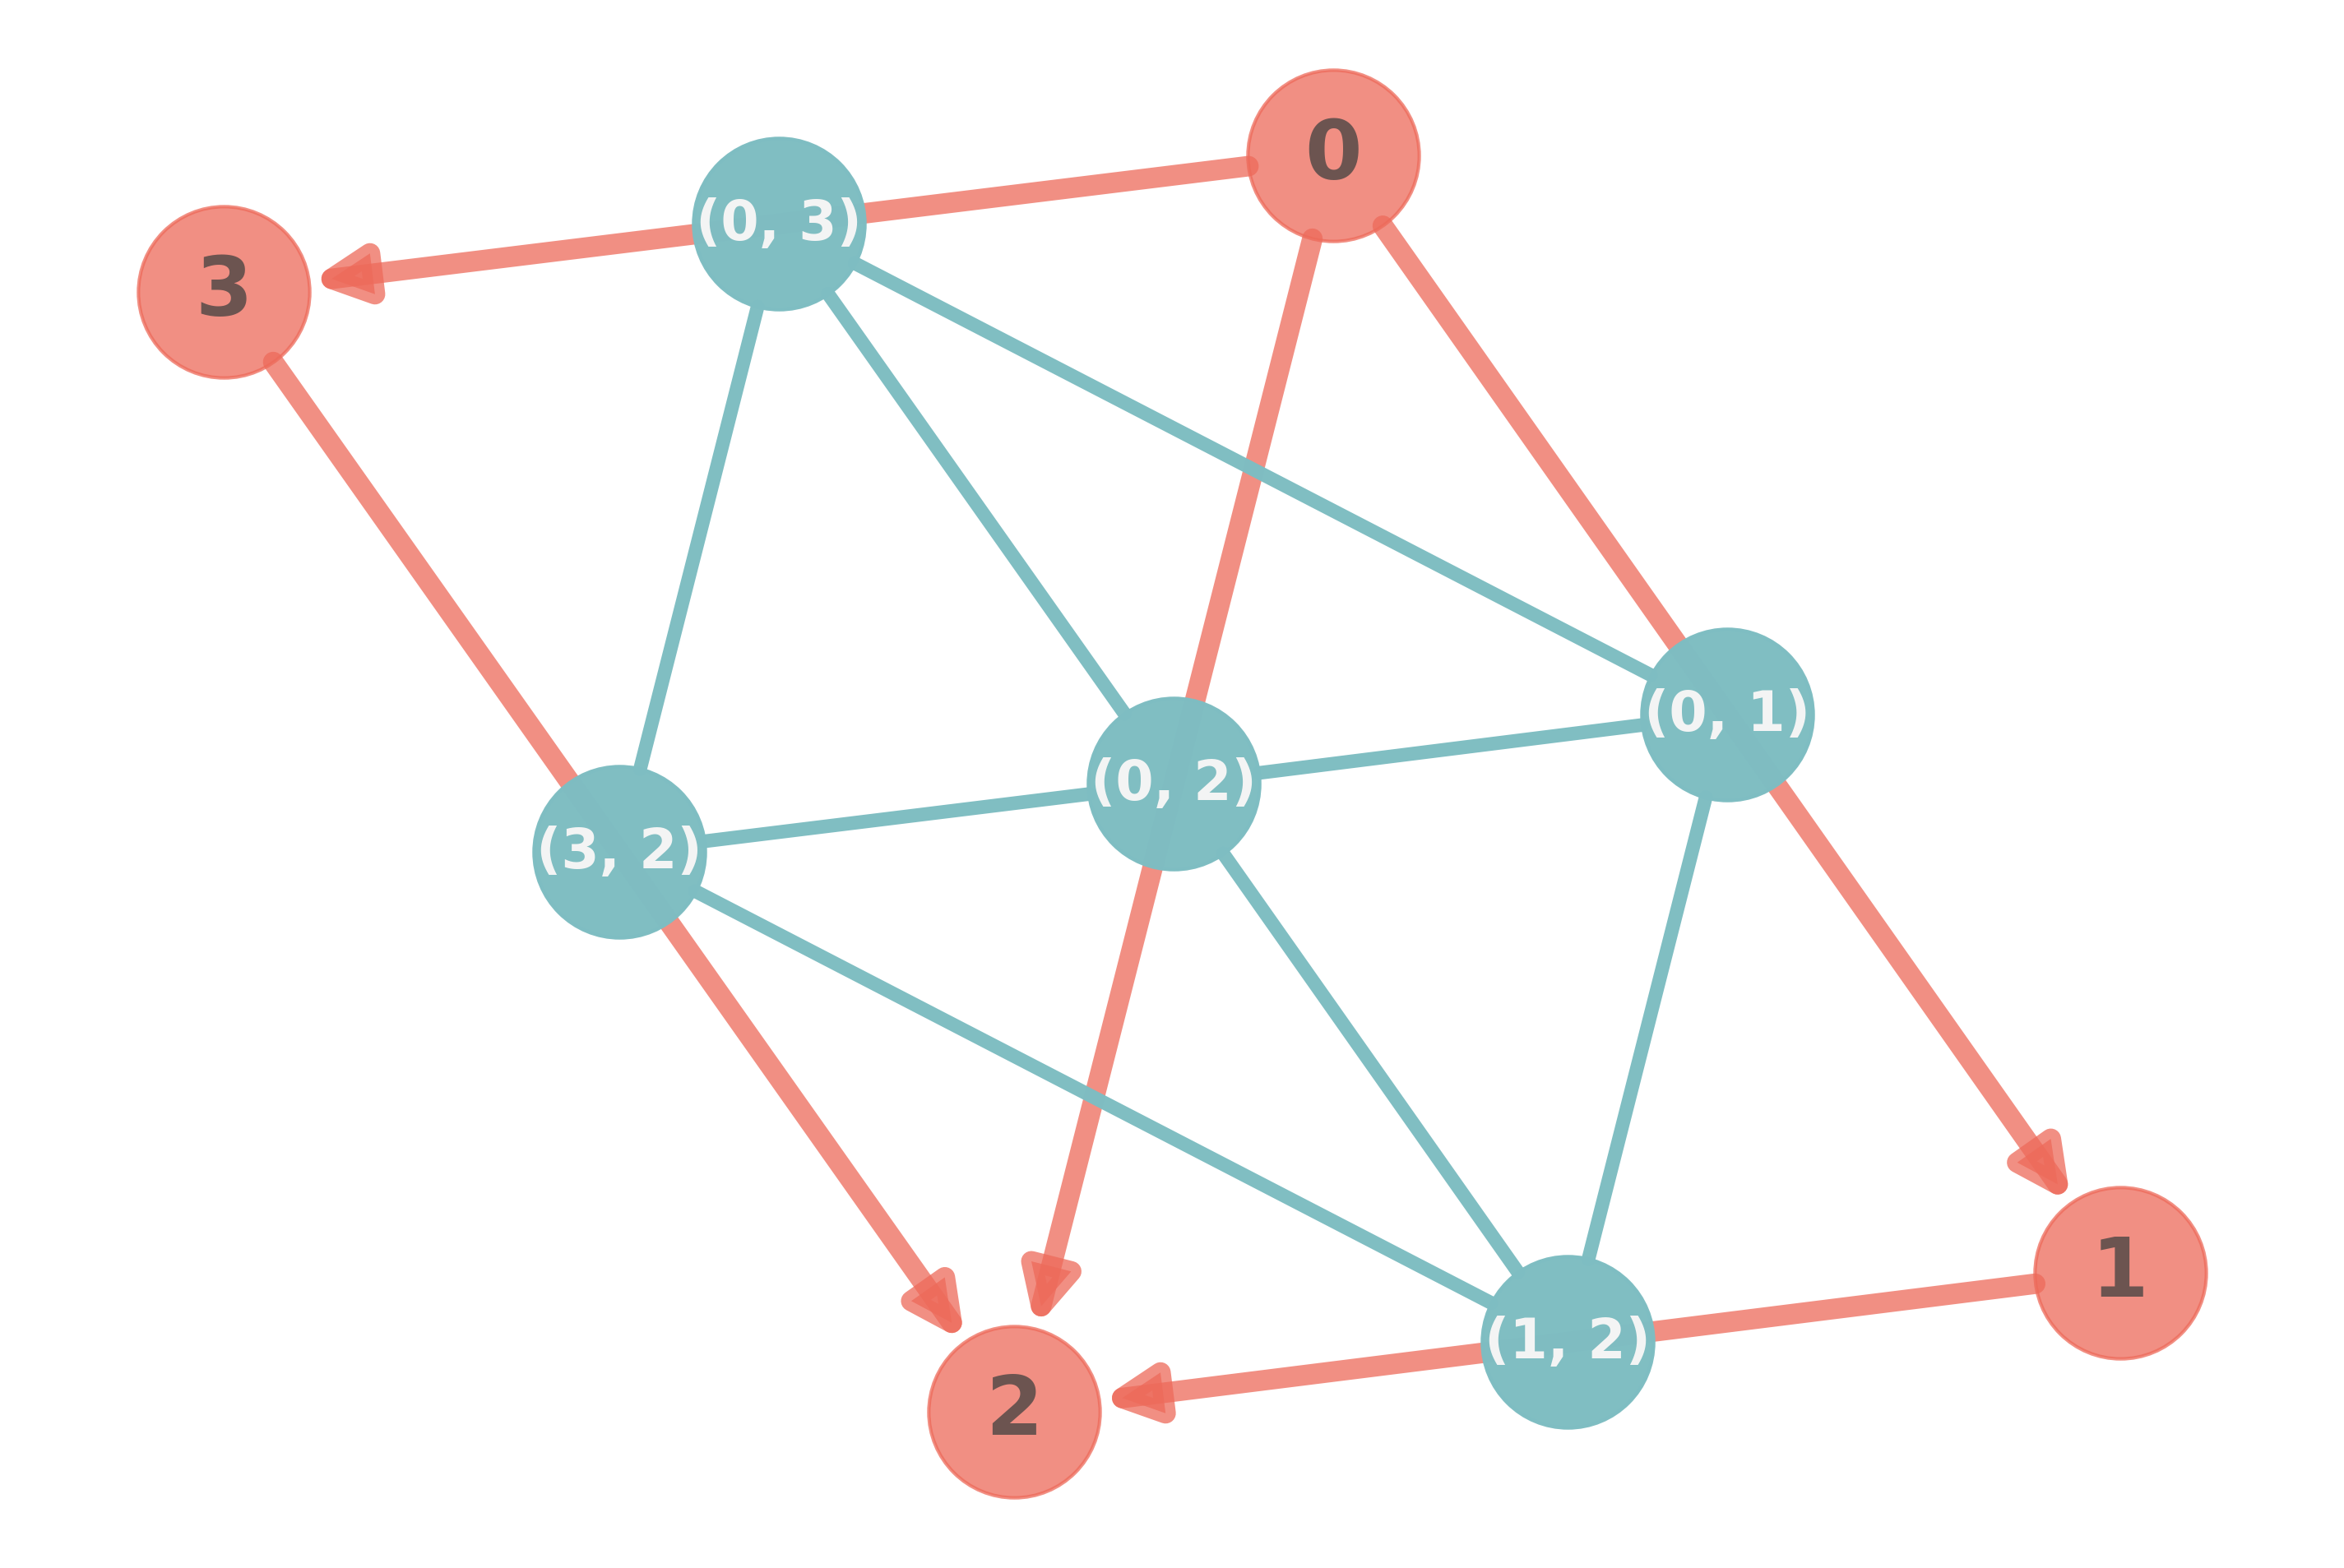

In [2]:
edges = [[0, 1], [0, 2], [0, 3], [1, 2], [3, 2]]

graph = nqx.graph.GraphHandler(edges = edges, plot = True)

## 2.1 Defining the Hilbert space

Now that the graph is defined, we can create a kinematical Hilbert space on this graph. This can be done using the `Hilbert` class available in the `hilbert` module. We can also create the state of gauge invariant kinematical states, but this will be the topic of another tutorial. For now, we will work with both gauge invariant and non-gauge invariant states.

To define a Hilbert space, simply create a `Hilbert` object as follows:

In [3]:
gaugeDims = 1
chargeCutoff = 3

H = nqx.hilbert.Hilbert(graph, chargeCutoff, step = 1, gauge_dimensions = gaugeDims)

In [4]:
H

A Hilbert space with a maximal spin cut-off of 3 and dimension 16.81 Thousand (10^3) with 7 local degrees of freedom ([-3 -2 -1  0  1  2  3]) at every edge

Here, we created a kinmeatical Hilbert space where $m_{max} = 3$, and the gauge dimensions are 1 (that is, we will have a $U(1)$ gauge group). Note that the gauge group is not created yet. However, specifying the gauge dimensions now ensures compatibility with the gauge group of choice later, irrespective of the gauge group itself. The `step` parameters is to indicate whether one has integer or half-integer increments and hence charge numbers. In this case, we use integer increments as charges $m \in \mathbb{Z}$.

## 2.2 Defining the gauge group

We can now choose the gauge group of choice. In this example, we will work with the Abelian $U(1)$ group. NeuraLQX comes with a complete implementation of the constraints for the $U(1)^N$ group. This can be used by using the `U1Gauge` class provided in the `gaugeGroups` module. This can be done as follows:

In [5]:
gaugeGroup = nqx.gaugeGroups.U1Gauge(H, gauge_dimensions = gaugeDims)

In [6]:
gaugeGroup

A gauge group of type: U(1)


## 2.3 Defining the gravitational model

Now, the Hilbert space, as well as the gauge group, are both ready to go. To tie everything together, neuraLQX comes with the `lqx` module which contains within it the implementation of the gravitational constraints (e.g. Curvature constraint of BF-theory, Thiemann regularised constraint for 3-d and 4-d LQG). This module includes within it the `WCL` (Weak Coupling Limit) module which includes the implementations of these constraints in the weak coupling limit of Smolin.

In this limit, the gauge group is $U(1)^3$. Hence, we will now work with the Euclidean $U(1)^3$ model of LQG. To define this, you can create a `EuclideanWCL` object as follows:

In [7]:
lqx = nqx.lqx.EuclideanWCL(H, gaugeGroup, spacetime_dims = 3)

This creates a model with a 3-dimensional spacetime, with a $U(1)$ gauge group, over the Hilbert space defined on the graph created above. The constraints in this model are now already implemented and ready to go. To inspect them, one can call

In [8]:
lqx.constraint

LocalOperator(dim=5, #acting_on=15 locations, constant=4.0, dtype=float64)

One can also check if the constraint is Hermitian by using

In [9]:
lqx.constraint.is_hermitian

True

as well as investigate the sites on which the constraint acts on (note, the site here correspond to the edges in the dual graph) by using

In [10]:
lqx.constraint.acting_on

[(0, 1, 3),
 (1, 2, 4),
 (0,),
 (0, 1),
 (0, 2),
 (1,),
 (1, 2),
 (2,),
 (0, 3),
 (3,),
 (1, 3),
 (1, 4),
 (3, 4),
 (4,),
 (2, 4)]

Lastly, one can investigate every sub-operator in this constraint acting on each one of those set of sites by

In [11]:
lqx.constraint.operators[2].toarray()

array([[18.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  8.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  8.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 18.]])

where we have now looked at the sub-operator which acts on the site 0.

## 2.4 Solving the constraints: exact diagonalisation

If the Hilbert space is small enough, one can perform exact diagonalisation of the constraint to arrive at solutions without needing any input from a neural network. In this case, the Hilbert space is of dimensions $\sim 10^{3}$ and hence, if we convert our constraint to a matrix, this will be a $10^3 \times 10^3$ matrix, which should be small enough to fit in memory during runtime.

To perform exact diagonalisation and arrive at the eigenvalue of the lowest eigenspace, simply use:

In [12]:
lqx.exact_diagonalization()


####################################################################################################
neuraLQX Printer:                                                             (2024-09-02 13:51:15)
Message: min<C> using Lanczos exact diagonalisation: 0.3895529709507423
####################################################################################################



You can also pass a number to the `exactDiagonalization()` function. If you do so, then the exact diagonalisation process will not be performed, and the model will consider the number you passed as the assumed value of exact diagonalisation.

## 2.5 Solving the constraints: neural networks

Whether the model is small enough or out-of-reach for exact diagonalisation methods, one can use the neural network quantum state (NQS) ansatz to solve the constraint. The `Solver` class in the `solver` module provides an interface in which the variational Monte-Carlo and the minimsation process of the expectation value of the constraint is performed. This class is also responsible for serialising and exporting the results to disc. To use it, simply execute

In [13]:
solver = nqx.solver.Solver(lqx)

In this minimsation process, one needs a sampler to sample the Hilbert space for Monte-Carlo process, an optimiser for the gradient descent process in the minimisation routine and lastly, a neural network implementation. We first start with the sampler.

NeuraLQX comes with several samplers already implemented. For example, the "Exact Sampler" samples the probability space directly, while the "Metropolis Local" sampler proposes new states, based on old states in the Markov-Chain, by randomly changing one quantum number at a time. The "Metropolis TwoLocal" does the same thing, but for two random quantum numbers at a time. The "Weighted Sampler" is one where you can choose multiple transition rules which will occur at the same time based on some probability determined by you. Lastly, the "U1 Gauge Sampler" samples only $U(1)$ gauge invariant states, however this will be discussed in another tutorial.

For now, we consider the Exact Sampler, which we can choose as follows:

In [14]:
solver.set_sampler(sampler_type = "Exact Sampler", number_of_samples = 100)


####################################################################################################
neuraLQX Printer:                                                             (2024-09-02 13:51:15)
Message: Sampler `Exact Sampler` initialized.
####################################################################################################



Next, we consider the Adaptive Momentum (Adam) optimiser. NeuraLQX also comes with several implementation, such as stochastic gradient descent (SGD), Momentum based descent, and more.

In [15]:
solver.set_optimizer(optimizer_type = "Adam", learning_rate = 0.004)


####################################################################################################
neuraLQX Printer:                                                             (2024-09-02 13:51:15)
Message: Optimizer `Adam` initialized.
####################################################################################################



The next step is to specify the network. In the `nn` module, you will find different implementations of neural network architectures provided by neuraLQX. In the following, we use the `RevNet` network

In [16]:
from neuralqx.nn.models import RevNet
import math
import flax.linen as nn

cnnF = 60
numberOfCnnBlocks = 1
layerSizes = [5, 4]

cnnFeatures = [cnnF] + [cnnF // i for i in [2 * i for i in range(1, numberOfCnnBlocks)]]

model = RevNet(
    sizes=[graph.dual_nk_graph.n_nodes * el if isinstance(graph.dual_nk_graph.n_nodes * el, int) else math.ceil(graph.dual_nk_graph.n_nodes * el)+1 for el in layerSizes],
    activations = [nn.hard_silu, nn.hard_silu],
    cnn_features = cnnFeatures,
    number_of_cnn_blocks = numberOfCnnBlocks,
    cnn_block_features = cnnFeatures,
    N = chargeCutoff
)



Now, we can set the network in the `solver` object by

In [17]:
solver.set_network(model)


####################################################################################################
neuraLQX Printer:                                                             (2024-09-02 13:51:15)
Message: Network `RevNet` initialized.
####################################################################################################



Now, we are ready to solve the model using the NQS ansatz with the specified parameters and network architecture. To start the simulation process, simply execute the command

  0%|          | 0/1000 [00:00<?, ?it/s]


####################################################################################################
neuraLQX Printer:                                                             (2024-09-02 13:51:40)
Message: State serialised to disc.
####################################################################################################

+--------------------------------------------------------------------------------------------------------------------------+
|     neuraLQX Output Log                                                   13:51:40 - 02.09.2024 (S:949HK16YFU) 1.0.0     |
+-----------------------+--------------------------------------------------------------------------------------------------+
|                       |                                                                                                  |
| Optimization Results: | +---------------------------------------------------+-----------------------------+              |
|                       | |         

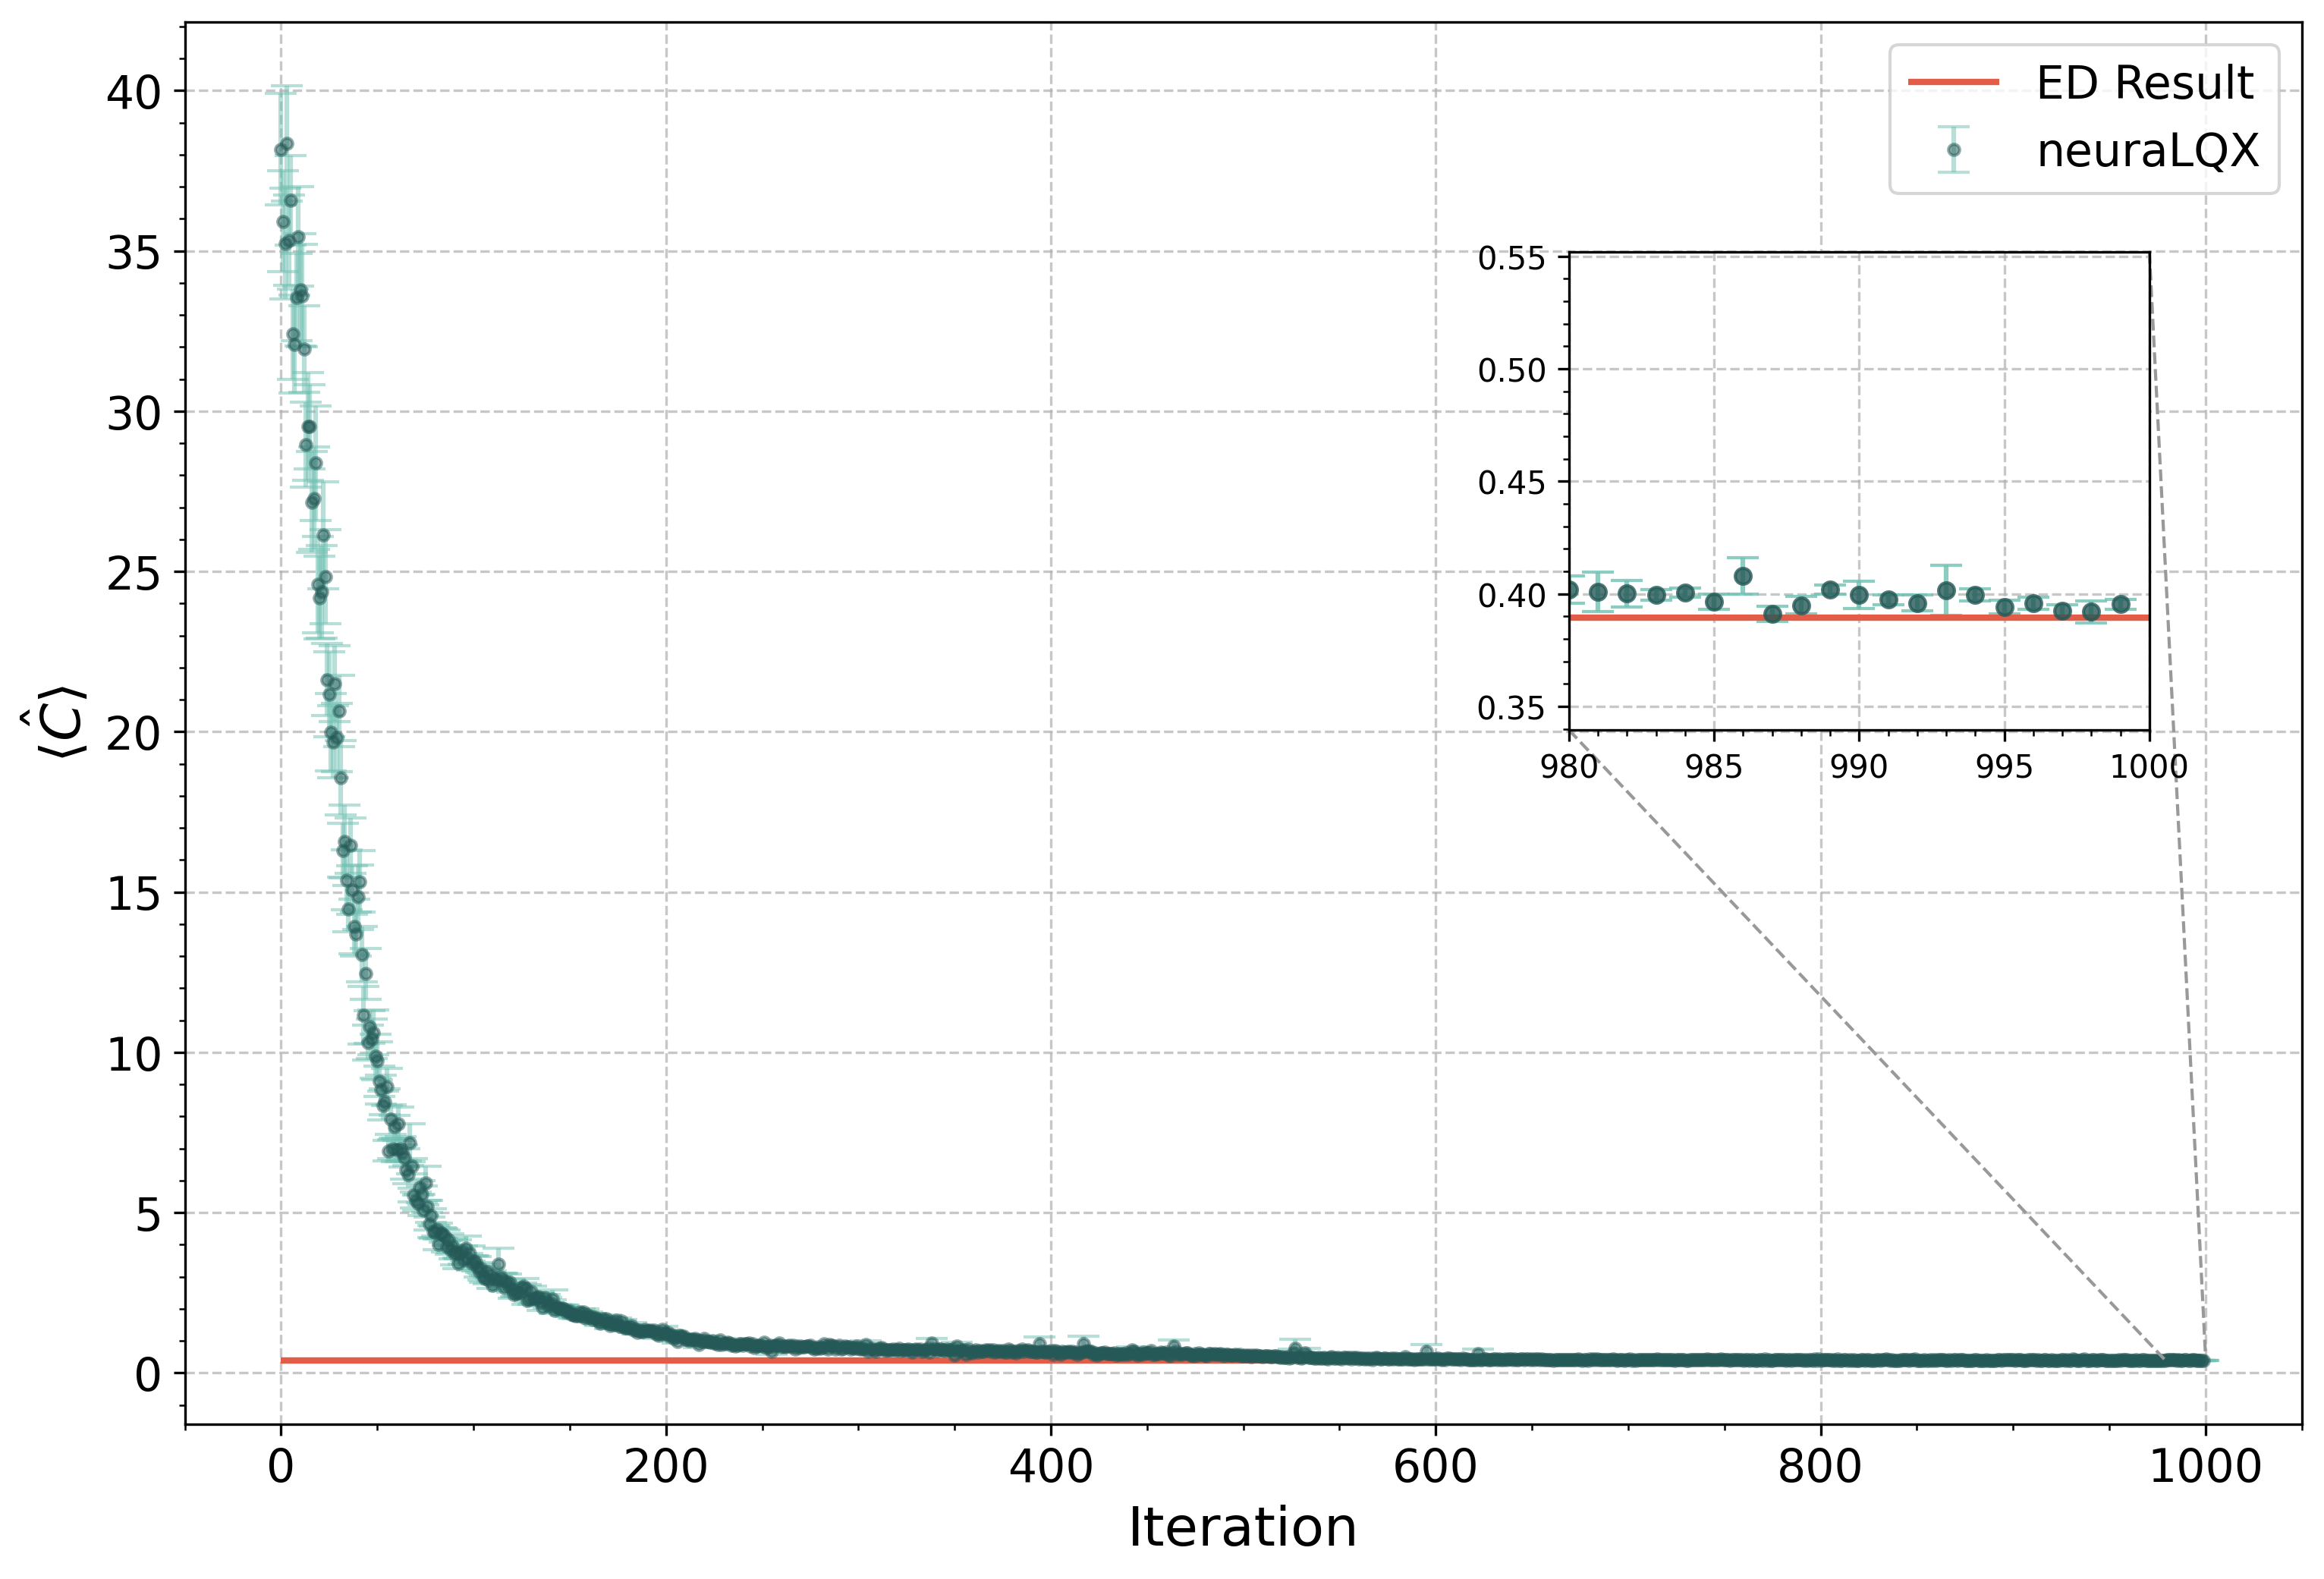

In [18]:
solver.run(number_of_iterations = 1000, silent_plot = False)

At the end of the simulation, all the results are exported to disc. This includes a .png image of the graph as well as the minimisation process, the data displayed in the output log in an .html file, the raw data in .json files, and the state (weights and biases) in an .mpack file.

As seen, the accuracy at the end of the simulation exceeds 98%, where the number of network parameters only consists of roughly 14% of the dimensions of the Hilbert space.

Lastly, we note that the eigenspace with minimum eigenvalue found is not the kernel. This is because of a ''frustration'' inherent to the model due to the fact that the $\hat{F}$ constraint is $U_q(1)$ gauge invariant, while the Gauß constraint $\hat{G}$ is only $U(1)$ gauge invariant. Something to try: increase the $m_{max}$ value and you will notice that we approach the continuum theory and $\langle\hat{C}\rangle \rightarrow 0$!

## 2.6 Some physics

Once the simulation is concluded, one can perform some physics. For example, we can check whether the minimal loop holonomies are flat (and hence the solutions we arrive at are genuinely flat solutions). We can also check the quantum fluctuations in the minimal loop holonomies. This is because the `EuclideanWCL` class comes with implementations of the holonomy and minimal loop holonomy operators. And once the simulation is concluded, we have the variational state which can be accessed via `solver.variationalState`. To compute the expectation value, the `variationalState` has a `.expect()` function which does so. Therefore, we can look at the flatness, as well as quantum fluctuations, of every minimal loop in the graph as follows:

In [19]:
for i, minimalCycle in enumerate(graph.minimal_cycles):

    print(f"\n<h(a{i})> = {solver.variational_state.expect(lqx.model.minimal_loop_holonomy(minimalCycle)).mean}")

    h = lqx.model.minimal_loop_holonomy(minimalCycle)
    hAdjoint = lqx.model.minimal_loop_holonomy(minimalCycle, adjoint = 1, vertex_index = len(minimalCycle) - 1)

    A = solver.variational_state.expect((h + hAdjoint) * (h + hAdjoint)).mean
    B = solver.variational_state.expect(h + hAdjoint).mean ** 2

    print(f"<(h(a{i}) + h(a{i})†)²> - <h(a{i}) + h(a{i})†>² = {A - B}")
    print()


<h(a0)> = 0.9099094745193127
<(h(a0) + h(a0)†)²> - <h(a0) + h(a0)†>² = 0.22208783965504963


<h(a1)> = 0.8839067686675842
<(h(a1) + h(a1)†)²> - <h(a1) + h(a1)†>² = 0.22084125275062627



whereby we now see that every minimal loop is *almost* flat, and the quantum fluctuations are relatively small.